In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# HW
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
#AMT_INCOME_TOTAL
app_train['EQUAL_WIDTH_INCOME_TOTAL'] = pd.cut(app_train['AMT_INCOME_TOTAL'], 10)
app_train['EQUAL_WIDTH_INCOME_TOTAL'].value_counts().sort_index()

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(23420520.0, 35117955.0]           0
(35117955.0, 46815390.0]           0
(46815390.0, 58512825.0]           0
(58512825.0, 70210260.0]           0
(70210260.0, 81907695.0]           0
(81907695.0, 93605130.0]           0
(93605130.0, 105302565.0]          0
(105302565.0, 117000000.0]         1
Name: EQUAL_WIDTH_INCOME_TOTAL, dtype: int64

In [7]:
app_train['EQUAL_FREQ_INCOME_TOTAL'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
app_train['EQUAL_FREQ_INCOME_TOTAL'].value_counts().sort_index()

(25649.999, 81000.0]       33391
(81000.0, 99000.0]         30280
(99000.0, 112500.0]        36907
(112500.0, 135000.0]       48849
(135000.0, 147150.0]        4333
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(180000.0, 225000.0]       44809
(225000.0, 270000.0]       19957
(270000.0, 117000000.0]    27161
Name: EQUAL_FREQ_INCOME_TOTAL, dtype: int64

In [14]:
#sub data
sub_app_train = app_train[['TARGET','AMT_INCOME_TOTAL','EQUAL_FREQ_INCOME_TOTAL']]
sub_app_train.head()

,TARGET,AMT_INCOME_TOTAL,EQUAL_FREQ_INCOME_TOTAL
0,1,202500.0,"(180000.0, 225000.0]"
1,0,270000.0,"(225000.0, 270000.0]"
2,0,67500.0,"(25649.999, 81000.0]"
3,0,135000.0,"(112500.0, 135000.0]"
4,0,121500.0,"(112500.0, 135000.0]"


In [17]:
income_total_group = sub_app_train.groupby('EQUAL_FREQ_INCOME_TOTAL').mean()
income_total_group

,TARGET,AMT_INCOME_TOTAL
EQUAL_FREQ_INCOME_TOTAL,,
"(25649.999, 81000.0]",0.081908,66254.124685
"(81000.0, 99000.0]",0.082232,91089.278813
"(99000.0, 112500.0]",0.087192,111333.276330
"(112500.0, 135000.0]",0.084894,131852.488657
"(135000.0, 147150.0]",0.090007,142953.056026
"(147150.0, 162000.0]",0.086407,157141.512098
"(162000.0, 180000.0]",0.084224,178061.632269
"(180000.0, 225000.0]",0.078065,212733.495347
"(225000.0, 270000.0]",0.070401,259491.085277


Text(0.5, 1.0, 'TARGET BY INCOME GORUP')

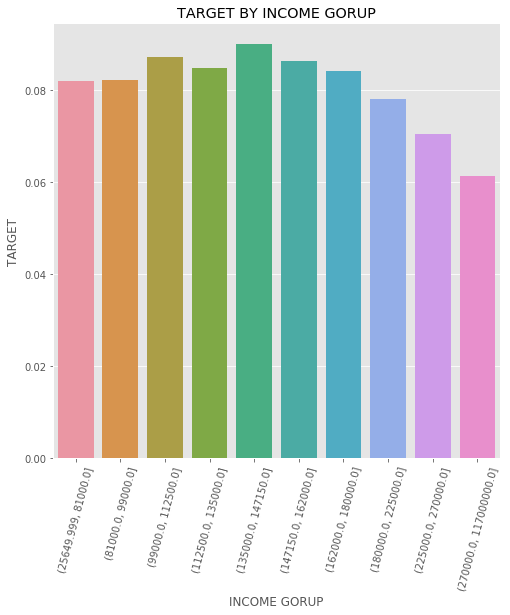

In [20]:
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

plt.figure(figsize = (8, 8))

px = income_total_group.index
py = income_total_group['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('INCOME GORUP'); plt.ylabel('TARGET')
plt.title('TARGET BY INCOME GORUP')